# Epidemic municipalities over time as a stream plot

In [1]:
import pandas as pd
import geopandas as gpd
import os
import altair as alt

## Loading the geo data

In [2]:
state_codes = {'ACRE':'AC', 'ALAGOAS':'AL', 'AMAPA':'AP', 'AMAZONAS':'AM', 'BAHIA':'BA', 
                     'CEARA':'CE', 'DISTRITO FEDERAL':'DF', 'ESPIRITO SANTO':'ES', 'GOIAS':'GO',
                     'MARANHAO':'MA', 'MATO GROSSO':'MT', 'MATO GROSSO DO SUL':'MS', 'MINAS GERAIS':'MG',
                     'PARA':'PA', 'PARAIBA':'PB', 'PARANA':'PR', 'PERNAMBUCO':'PE', 'PIAUI':'PI', 'RIO DE JANEIRO':'RJ',
                   'RIO GRANDE DO NORTE':'RN', 'RIO GRANDE DO SUL':'RS', 'RONDONIA':'RO', 'RORAIMA':'RR',
                    'SANTA CATARINA':'SC', 'SAO PAULO':'SP', 'SERGIPE':'SE', 'TOCANTINS':'TO'}
state_names = {v: k for k, v in state_codes.items()}
state_names

{'AC': 'ACRE',
 'AL': 'ALAGOAS',
 'AP': 'AMAPA',
 'AM': 'AMAZONAS',
 'BA': 'BAHIA',
 'CE': 'CEARA',
 'DF': 'DISTRITO FEDERAL',
 'ES': 'ESPIRITO SANTO',
 'GO': 'GOIAS',
 'MA': 'MARANHAO',
 'MT': 'MATO GROSSO',
 'MS': 'MATO GROSSO DO SUL',
 'MG': 'MINAS GERAIS',
 'PA': 'PARA',
 'PB': 'PARAIBA',
 'PR': 'PARANA',
 'PE': 'PERNAMBUCO',
 'PI': 'PIAUI',
 'RJ': 'RIO DE JANEIRO',
 'RN': 'RIO GRANDE DO NORTE',
 'RS': 'RIO GRANDE DO SUL',
 'RO': 'RONDONIA',
 'RR': 'RORAIMA',
 'SC': 'SANTA CATARINA',
 'SP': 'SAO PAULO',
 'SE': 'SERGIPE',
 'TO': 'TOCANTINS'}

In [3]:
brmap = gpd.read_file('./data/muni_br.gpkg')
brmap.head()

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1100015.0,Alta Floresta D'oeste,11,RO,"POLYGON ((-62.23224 -11.90804, -62.20670 -11.8..."
1,1100023.0,Ariquemes,11,RO,"POLYGON ((-63.57327 -9.78326, -63.57016 -9.773..."
2,1100031.0,Cabixi,11,RO,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049.0,Cacoal,11,RO,"POLYGON ((-61.27873 -11.50596, -61.28097 -11.5..."
4,1100056.0,Cerejeiras,11,RO,"POLYGON ((-61.41347 -13.23417, -61.42603 -13.2..."


In [4]:
# Creating a dictionary of city names
muninames = {}
for row in brmap[['code_muni','name_muni']].itertuples():
    muninames[int(row[1])] = row[2]
# muninames

## Loading the Epi data

In [53]:
state = 'RJ'
agravo = 'dengue'
statemap = brmap[brmap.abbrev_state==state]
statemap.code_muni = statemap.code_muni.astype(int)
df_state = pd.read_parquet(f'data/{state}_{agravo}.parquet')
df_state

/home/fccoelho/Documentos/Projects_Software/visualization/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2023-07-23,202330,0.0,0,0.0,0,3305901,0.0,0.000000,0,1,...,0,85.138567,76.646614,21.969231,23.647059,None,None,None,None,None
2023-07-23,202330,0.0,0,0.0,0,3302403,0.0,0.000000,0,1,...,0,85.138567,76.646614,21.969231,23.647059,None,None,None,None,None
2023-07-23,202330,0.0,0,0.0,0,3300506,0.0,0.000000,0,1,...,0,85.138567,76.646614,21.969231,23.647059,None,None,None,None,None
2023-07-23,202330,0.0,0,0.0,0,3301108,0.0,0.000000,0,1,...,0,NaN,NaN,NaN,NaN,None,None,None,None,None
2023-07-23,202330,0.0,0,0.0,0,3303807,0.0,0.000000,0,1,...,0,60.272705,47.031742,20.981366,25.130435,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-03,201001,0.0,0,0.0,0,3304110,0.0,0.000000,0,1,...,0,65.791214,45.285714,28.164814,33.142857,None,None,None,None,None
2010-01-03,201001,1.0,1,1.0,1,3300308,0.0,0.992418,0,1,...,0,74.451000,51.714286,28.066371,33.142857,None,None,None,None,None
2010-01-03,201001,0.0,0,0.0,0,3305604,0.0,0.000000,0,1,...,0,72.359300,63.857143,29.291114,31.857143,None,None,None,None,None


## Creating the Epidemic column
Here we define the criteria for an epidemic. We can use the number of cases per 100k inhabitants or the alert level. Alternatively, we can use red alert as a proxy for epidemic.

In [54]:
df_state['epi'] = df_state.p_inc100k>100 # 100 cases per 100k inhabitants
# df_state['epi'] = df_state.nivel==4 # red alert


### Looking at a particular week

In [55]:
case_map = statemap.merge(df_state.reset_index(), left_on='code_muni', right_on='municipio_geocodigo')
case_map.set_index('data_iniSE', inplace=True)
def get_snapshot(date):
    m = case_map.loc[date]
    return m
    

In [56]:
snap = get_snapshot('2021-09-26')
# snap.plot(column='epi', legend=True)

In [57]:
snap

,code_muni,name_muni,code_state,abbrev_state,geometry,SE,casos_est,casos_est_min,casos_est_max,casos,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,epi
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2021-09-26,3300100,Angra Dos Reis,33,RJ,"MULTIPOLYGON (((-44.15109 -23.21602, -44.14913...",202139,4.0,4,4.0,4,...,59.311457,38.291457,26.112243,31.857143,None,None,None,None,None,False
2021-09-26,3300159,Aperibé,33,RJ,"MULTIPOLYGON (((-42.18619 -21.67985, -42.18403...",202139,0.0,0,0.0,0,...,69.411757,59.519814,26.071429,28.285714,None,None,None,None,None,False
2021-09-26,3300209,Araruama,33,RJ,"MULTIPOLYGON (((-42.37622 -22.85942, -42.36993...",202139,0.0,0,0.0,0,...,77.779686,66.924429,24.026171,26.285714,None,None,None,None,None,False
2021-09-26,3300225,Areal,33,RJ,"MULTIPOLYGON (((-43.16057 -22.20341, -43.15963...",202139,0.0,0,0.0,0,...,73.406114,53.281229,24.041914,28.285714,None,None,None,None,None,False
2021-09-26,3300233,Armação Dos Búzios,33,RJ,"MULTIPOLYGON (((-41.94604 -22.72796, -41.94621...",202139,4.0,4,4.0,4,...,84.016771,60.494000,24.184529,29.428571,None,None,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,3306008,Três Rios,33,RJ,"MULTIPOLYGON (((-43.21529 -22.07102, -43.14633...",202139,2.0,2,2.0,2,...,73.406114,53.281229,24.041914,28.285714,None,None,None,None,None,False
2021-09-26,3306107,Valença,33,RJ,"MULTIPOLYGON (((-44.15907 -22.26109, -44.15878...",202139,4.0,4,4.0,4,...,NaN,NaN,NaN,NaN,None,None,None,None,None,False
2021-09-26,3306156,Varre-Sai,33,RJ,"MULTIPOLYGON (((-41.90404 -20.87805, -41.89617...",202139,0.0,0,0.0,0,...,69.411757,59.519814,26.071429,28.285714,None,None,None,None,None,False


In [58]:
spec = (
        alt.Chart(
            data=snap,
            padding={"left": 0, "top": 0, "right": 0, "bottom": 0},
        )
        .mark_geoshape()
        .encode(
            color=alt.Color(
                "epi:Q",
                sort="ascending",
                scale=alt.Scale(
                    scheme="set2",
                    domainMin=0,
                ),
                legend=alt.Legend(
                    title="Epidemic",
                    orient="bottom",
                    tickCount=10,
                ),
            ),
            tooltip=["name_muni:N",  "nivel:Q"],
        )  # .add_params(select_year)#.transform_filter(select_year)
        .properties(width=500, height=400)
    )
spec

alt.Chart(...)

## Creating the Stream plot with altair
First we need to create a more compact dataframe with the count of cities where epi is true or false. Here we also calculate the residual, which is the difference between the number of cities where epi is true and the `receptivo` is false. 

We also calculate the confusion matrix, which is the number of true positives, false positives, true negatives and false negatives.

In [59]:
receptivo = case_map[case_map.receptivo==1]
case_map['TP'] = (case_map.epi==True) & (case_map.receptivo==1)
case_map['FP'] = (case_map.epi==False) & (case_map.receptivo==1)
case_map['FN'] = (case_map.epi==True) & (case_map.receptivo==0)
case_map['TN'] = (case_map.epi==False) & (case_map.receptivo==0)

case_map['residual'] = (case_map.epi==True) & (case_map.receptivo==0)
residual = case_map.groupby('data_iniSE').agg({'residual': 'sum'})
# residual = case_map[(case_map.receptivo==0) & (case_map.epi==True)].groupby('data_iniSE').agg({'epi': 'count'})
counts = receptivo.reset_index()[['data_iniSE', 'epi']]\
          .groupby(['data_iniSE','epi']).agg({'epi': 'count'}) # count of cities in each category
counts.columns = ['count']
counts.sort_values(['data_iniSE'], inplace=True)
counts.reset_index(inplace=True)
counts.loc[counts.epi==False, 'count'] *= -1
counts.epi.replace({True:'Epidemic', False:'No Epidemic'}, inplace=True)
counts

,data_iniSE,epi,count
0,2010-01-03,No Epidemic,-35
1,2010-01-03,Epidemic,2
2,2010-01-10,No Epidemic,-35
3,2010-01-10,Epidemic,2
4,2010-01-17,No Epidemic,-28
...,...,...,...
622,2023-05-07,No Epidemic,-8
623,2023-05-28,No Epidemic,-1
624,2023-06-11,No Epidemic,-16
625,2023-06-11,Epidemic,3


In [60]:
SP = (alt.Chart(counts).mark_bar().encode(
    alt.X('data_iniSE:T').axis(format='%Y', domain=False, 
                               tickSize=0, labelAngle=-90).title('Date'),
    alt.Y('count:Q').stack(False),#.axis(None),
    alt.Color('epi:N').scale(scheme='set1'),
    tooltip=["data_iniSE:T",  "count:Q"]
).properties(width=1200, height=400)
.interactive())
R = alt.Chart(residual.reset_index()).mark_bar(
    color='red'
).encode(
    alt.X('data_iniSE:T').axis(format='%Y', domain=False, tickSize=0, labelAngle=-90).title('Date'),
    alt.Y('residual:Q').axis().title('Cities'),
    # alt.Color('epi:N').scale(scheme='set1'),
    tooltip=["data_iniSE:T",  "residual:Q"]
).properties(width=1200, height=100)
alt.vconcat(SP, R).configure_view(stroke=None
                                  )

alt.VConcatChart(...)

In [61]:
acertos = gpd.GeoDataFrame(case_map.groupby('code_muni').agg({'receptivo':'sum',
                                                              'epi': 'sum', 
                                                              'residual':'sum',
                                                              'TP':'sum', 
                                                              'FP':'sum',
                                                              'FN':'sum',
                                                              'TN':'sum',
                                                              'code_muni':'first', 'geometry':'first', 'name_muni':'first'}))
acertos

,receptivo,epi,residual,TP,FP,FN,TN,code_muni,geometry,name_muni
code_muni,,,,,,,,,,
3300100,255,41,20,21,234,20,433,3300100,"MULTIPOLYGON (((-44.15109 -23.21602, -44.14913...",Angra Dos Reis
3300159,124,18,4,14,110,4,580,3300159,"MULTIPOLYGON (((-42.18619 -21.67985, -42.18403...",Aperibé
3300209,271,13,0,13,258,0,437,3300209,"MULTIPOLYGON (((-42.37622 -22.85942, -42.36993...",Araruama
3300225,76,28,10,18,58,10,622,3300225,"MULTIPOLYGON (((-43.16057 -22.20341, -43.15963...",Areal
3300233,84,32,18,14,70,18,606,3300233,"MULTIPOLYGON (((-41.94604 -22.72796, -41.94621...",Armação Dos Búzios
...,...,...,...,...,...,...,...,...,...,...
3306008,153,9,0,9,144,0,555,3306008,"MULTIPOLYGON (((-43.21529 -22.07102, -43.14633...",Três Rios
3306107,107,47,40,7,100,40,561,3306107,"MULTIPOLYGON (((-44.15907 -22.26109, -44.15878...",Valença
3306156,90,26,4,22,68,4,614,3306156,"MULTIPOLYGON (((-41.90404 -20.87805, -41.89617...",Varre-Sai


### Mapping Accuracy and MCC
The Mathews Correlation Coefficient is a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient. [Source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)

In [62]:
acertos['accuracy'] = (acertos.TP+acertos.TN)/(acertos.TP+acertos.TN+acertos.FP+acertos.FN)
acertos['MCC'] = (acertos.TP*acertos.TN-acertos.FP*acertos.FN)/((acertos.TP+acertos.FP)*(acertos.TP+acertos.FN)*(acertos.TN+acertos.FP)*(acertos.TN+acertos.FN))**0.5

In [63]:
TP = (
    alt.Chart(
        data=acertos,
        # padding={"left": 0, "top": 0, "right": 0, "bottom": 0},
    )
    .mark_geoshape()
    .encode(
        color=alt.Color(
            "TP:Q",
            sort="ascending",
            scale=alt.Scale(
                scheme="blues",
                domainMin=0,
            ),
            legend=alt.Legend(
                title="True Positives",
                orient="bottom",
                tickCount=10,
            ),
        ),
        tooltip=["name_muni:N",  "epi:Q"],
    )  # .add_params(select_year)#.transform_filter(select_year)
    .properties(width=500, height=400)
)
FN = (
    alt.Chart(
        data=acertos,
        # padding={"left": 0, "top": 0, "right": 0, "bottom": 0},
    )
    .mark_geoshape()
    .encode(
        color=alt.Color(
            "residual:Q",
            sort="ascending",
            scale=alt.Scale(
                scheme="reds",
                domainMin=0,
            ),
            legend=alt.Legend(
                title="False Negatives",
                orient="bottom",
                tickCount=10,
            ),
        ),
        tooltip=["name_muni:N",  "residual:Q"],
    )  # .add_params(select_year)#.transform_filter(select_year)
    .properties(width=500, height=400)
)
alt.hconcat(TP, FN).resolve_scale(color='independent')

alt.HConcatChart(...)

In [64]:
ACC = (
    alt.Chart(
        data=acertos,
        title='Accuracy',
        # padding={"left": 0, "top": 0, "right": 0, "bottom": 0},
    )
    .mark_geoshape()
    .encode(
        color=alt.Color(
            "accuracy:Q",
            sort="ascending",
            scale=alt.Scale(
                scheme="reds",
                domainMin=0,
            ),
            legend=alt.Legend(
                title="Accuracy",
                orient="bottom",
                tickCount=10,
            ),
        ),
        tooltip=["name_muni:N",  "accuracy:Q"],
    )  # .add_params(select_year)#.transform_filter(select_year)
    .properties(width=500, height=400)
)
ACC

alt.Chart(...)

In [69]:
MCC = (
    alt.Chart(
        data=acertos,
        title='Matthews Correlation Coefficient',
        # padding={"left": 0, "top": 0, "right": 0, "bottom": 0},
    )
    .mark_geoshape()
    .encode(
        color=alt.Color(
            "MCC:Q",
            sort="ascending",
            scale=alt.Scale(
                scheme="reds",
                domainMin=0,
            ),
            legend=alt.Legend(
                title="MCC",
                orient="bottom",
                tickCount=10,
            ),
        ),
        tooltip=["name_muni:N",  "MCC:Q"],
    )  # .add_params(select_year)#.transform_filter(select_year)
    .properties(width=800, height=600)
)
MCC

alt.Chart(...)

In [66]:
case_map.receptivo.value_counts()

receptivo
0    50707
1    14429
Name: count, dtype: int64

<Axes: >

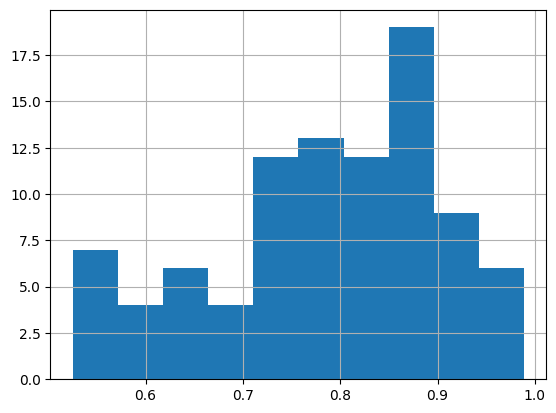

In [67]:
acertos.accuracy.hist()


In [68]:
acertos.receptivo.sum()

14429